<a href="https://colab.research.google.com/github/CS-Edwards/flight_delay_data_dashboard/blob/main/flight_delay_reg_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Delay Predictions
## By: CS- Edwards
This notebook uses public flight data sourced from BiqQuery, to explores Linear Regression and Decision Tree Regression, to predict flight arrival delays based on data.


In [ ]:
import sys

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import numpy as np



**Load Data**

Flight data from 2008-2010, originating from: 
<ul>
<li> Hartsfield-Jackson International Airport `ATL` in Atlanta, GA 
<li> O'Hare International Airport `ORD` in Chicago, Il
<li> John F. Kennedy International Airport `JFK` in Queens,  NY
</ul> 


Data sourced from `bigquery-samples.airline_ontime_data.flights`.

**SQL Query**
```
SELECT *
FROM `bigquery-samples.airline_ontime_data.flights`
WHERE (date BETWEEN '2008-1-1' AND '2010-12-31') AND (departure_airport='JFK' OR departure_airport='ORD' OR departure_airport='ATL')
```

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bq-results-20221231-045257-1672462759393/bq-results-20221231-045257-1672462759393.csv')

In [ ]:
data.head()

,date,airline,airline_code,departure_airport,departure_state,departure_lat,departure_lon,arrival_airport,arrival_state,arrival_lat,arrival_lon,departure_schedule,departure_actual,departure_delay,arrival_schedule,arrival_actual,arrival_delay
0,2008-10-17,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1920,1925,5,2313,2337,24
1,2010-03-25,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1810,1818,8,2147,2155,8
2,2010-07-28,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1815,1812,-3,2210,2200,-10
3,2010-07-26,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1815,1801,-14,2210,2202,-8
4,2010-08-02,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,930,936,6,1318,1317,-1


In [ ]:
data.groupby(['departure_airport','airline'])
data.head()

,date,airline,airline_code,departure_airport,departure_state,departure_lat,departure_lon,arrival_airport,arrival_state,arrival_lat,arrival_lon,departure_schedule,departure_actual,departure_delay,arrival_schedule,arrival_actual,arrival_delay
0,2008-10-17,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1920,1925,5,2313,2337,24
1,2010-03-25,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1810,1818,8,2147,2155,8
2,2010-07-28,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1815,1812,-3,2210,2200,-10
3,2010-07-26,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1815,1801,-14,2210,2202,-8
4,2010-08-02,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,930,936,6,1318,1317,-1


In [ ]:
month_map={
    "01":"January",
    "02": "February",
    "03":"March",
    "04": "April",
    "05":"May",
    "06":"June",
    "07": "July",
    "08": "August",
    "09":"September",
    "10":"October",
    "11":"November",
    "12":"December"
}

In [ ]:
month_map.get('01')


'January'

In [ ]:
def month_m(date):
  return month_map.get(date)

In [ ]:
data['month_num']  = data['date'].str.slice(start=5,stop=7)

In [ ]:
data['month_label'] = data['month_num'].map(month_m)

In [ ]:
data['year'] = data['date'].str.slice(stop=4)
data.head()

,date,airline,airline_code,departure_airport,departure_state,departure_lat,departure_lon,arrival_airport,arrival_state,arrival_lat,arrival_lon,departure_schedule,departure_actual,departure_delay,arrival_schedule,arrival_actual,arrival_delay,month_num,month_label,year
0,2008-10-17,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1920,1925,5,2313,2337,24,10,October,2008
1,2010-03-25,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1810,1818,8,2147,2155,8,03,March,2010
2,2010-07-28,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1815,1812,-3,2210,2200,-10,07,July,2010
3,2010-07-26,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,1815,1801,-14,2210,2202,-8,07,July,2010
4,2010-08-02,AS,19930,ORD,IL,41.98,-87.9,ANC,AK,61.17,-149.99,930,936,6,1318,1317,-1,08,August,2010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857019 entries, 0 to 1857018
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   airline             object 
 2   airline_code        int64  
 3   departure_airport   object 
 4   departure_state     object 
 5   departure_lat       float64
 6   departure_lon       float64
 7   arrival_airport     object 
 8   arrival_state       object 
 9   arrival_lat         float64
 10  arrival_lon         float64
 11  departure_schedule  int64  
 12  departure_actual    int64  
 13  departure_delay     int64  
 14  arrival_schedule    int64  
 15  arrival_actual      int64  
 16  arrival_delay       int64  
 17  month_num           object 
 18  month_label         object 
 19  year                object 
dtypes: float64(4), int64(7), object(9)
memory usage: 283.4+ MB


Exploratory Analysis

In [ ]:
print('Departure Delay')
print('Min: ' , data['departure_delay'].min())
print('Max: ' , data['departure_delay'].max())
print('Mean: ' , data['departure_delay'].mean())
print('S.Dev: ' , data['departure_delay'].std())
print('Median: ' , data['departure_delay'].median())


Departure Delay
Min:  -60
Max:  1331
Mean:  10.659704612607625
S.Dev:  33.69184654146598
Median:  -1.0


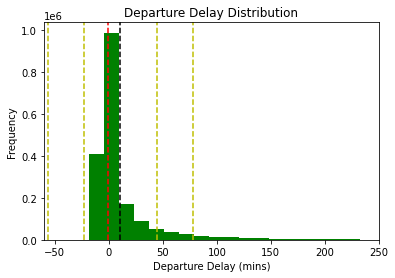

In [ ]:
plt.hist(data['departure_delay'],bins= 100, color='g')
plt.xlabel('Departure Delay (mins)')
plt.xlim(data['departure_delay'].min(),250)
plt.ylabel('Frequency')
plt.title('Departure Delay Distribution')

plt.axvline(data['departure_delay'].mean(), color='k', linestyle='dashed')
plt.axvline(data['departure_delay'].median(), color='r', linestyle='dashed')
plt.axvline((data['departure_delay'].mean() + data['departure_delay'].std()), color='y', linestyle='dashed')
plt.axvline((data['departure_delay'].mean() - data['departure_delay'].std()), color='y', linestyle='dashed')
plt.axvline((data['departure_delay'].mean() + data['departure_delay'].std()*2), color='y', linestyle='dashed')
plt.axvline((data['departure_delay'].mean() - data['departure_delay'].std()*2), color='y', linestyle='dashed')
plt.show()

In [ ]:
print('Arrival Delay')
print('Min: ' , data['arrival_delay'].min())
print('Max: ' , data['arrival_delay'].max())
print('Mean: ' , data['arrival_delay'].mean())
print('S.Dev: ' , data['arrival_delay'].std())
print('Median: ' , data['arrival_delay'].median())

Arrival Delay
Min:  -108
Max:  1311
Mean:  6.547118796307415
S.Dev:  37.68288271730113
Median:  -3.0


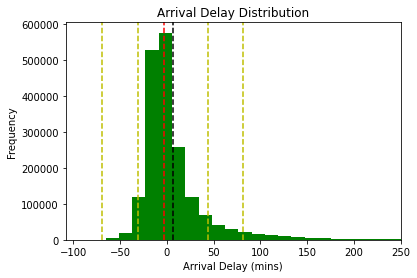

In [ ]:
plt.hist(data['arrival_delay'],bins= 100, color='g')
plt.xlabel('Arrival Delay (mins)')
plt.xlim(data['arrival_delay'].min(),250)
plt.ylabel('Frequency')
plt.title('Arrival Delay Distribution')

plt.axvline(data['arrival_delay'].mean(), color='k', linestyle='dashed')
plt.axvline(data['arrival_delay'].median(), color='r', linestyle='dashed')
plt.axvline((data['arrival_delay'].mean() + data['arrival_delay'].std()), color='y', linestyle='dashed')
plt.axvline((data['arrival_delay'].mean() - data['arrival_delay'].std()), color='y', linestyle='dashed')
plt.axvline((data['arrival_delay'].mean() + data['arrival_delay'].std()*2), color='y', linestyle='dashed')
plt.axvline((data['arrival_delay'].mean() - data['arrival_delay'].std()*2), color='y', linestyle='dashed')

plt.show()

**Variable Correlation Matrix**

In [ ]:
feature_cols = ['departure_lat',	'departure_lon',	'arrival_lat',	'arrival_lon',	'departure_schedule',	'departure_actual',	'departure_delay',	'arrival_schedule',	'arrival_actual',	'arrival_delay'	]
data_2 = data.filter(feature_cols, axis=1)
data_2.head()

,departure_lat,departure_lon,arrival_lat,arrival_lon,departure_schedule,departure_actual,departure_delay,arrival_schedule,arrival_actual,arrival_delay
0,41.98,-87.9,61.17,-149.99,1920,1925,5,2313,2337,24
1,41.98,-87.9,61.17,-149.99,1810,1818,8,2147,2155,8
2,41.98,-87.9,61.17,-149.99,1815,1812,-3,2210,2200,-10
3,41.98,-87.9,61.17,-149.99,1815,1801,-14,2210,2202,-8
4,41.98,-87.9,61.17,-149.99,930,936,6,1318,1317,-1


In [ ]:
cormat=data_2.corr()
round(cormat,3)

,departure_lat,departure_lon,arrival_lat,arrival_lon,departure_schedule,departure_actual,departure_delay,arrival_schedule,arrival_actual,arrival_delay
departure_lat,1.000,-0.072,0.221,-0.123,-0.080,-0.073,0.004,0.001,0.003,-0.032
departure_lon,-0.072,1.000,-0.158,-0.000,0.026,0.020,0.009,0.014,-0.004,-0.036
arrival_lat,0.221,-0.158,1.000,-0.015,0.024,0.029,0.009,0.029,0.024,0.007
arrival_lon,-0.123,-0.000,-0.015,1.000,0.009,0.005,0.011,-0.018,-0.021,0.048
departure_schedule,-0.080,0.026,0.024,0.009,1.000,0.961,0.145,0.837,0.682,0.118
departure_actual,-0.073,0.020,0.029,0.005,0.961,1.000,0.180,0.822,0.701,0.154
departure_delay,0.004,0.009,0.009,0.011,0.145,0.180,1.000,0.131,-0.015,0.914
arrival_schedule,0.001,0.014,0.029,-0.018,0.837,0.822,0.131,1.000,0.769,0.103
arrival_actual,0.003,-0.004,0.024,-0.021,0.682,0.701,-0.015,0.769,1.000,-0.026
arrival_delay,-0.032,-0.036,0.007,0.048,0.118,0.154,0.914,0.103,-0.026,1.000


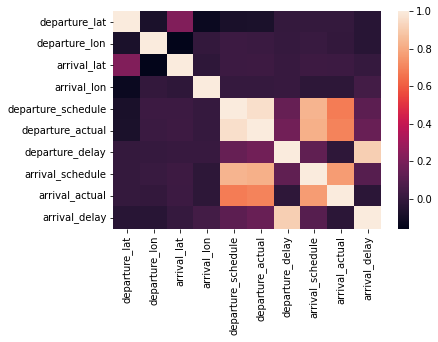

In [ ]:
sns.heatmap(cormat)

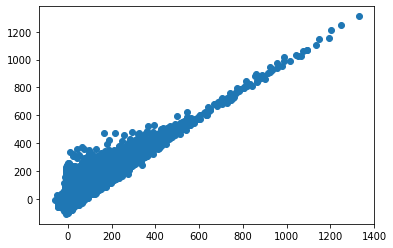

In [ ]:
plt.scatter(data_2['departure_delay'],data_2['arrival_delay']) #strong corr

**Predictive Models**

Simple Linear Regression

In [ ]:
X = data_2['departure_delay'] #training feature
y = data_2['arrival_delay'] #label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state=23)

In [ ]:
X_train.shape

(1114211,)

In [ ]:
X_train = np.array(X_train).reshape(-1,1)
X_train.shape

(1114211, 1)

In [ ]:
X_test = np.array(X_test).reshape(-1,1)
X_test.shape

(742808, 1)

In [ ]:
lin_model = LinearRegression()

In [ ]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train1 = lin_model.predict(X_train)

Text(0.5, 1.0, 'Training')

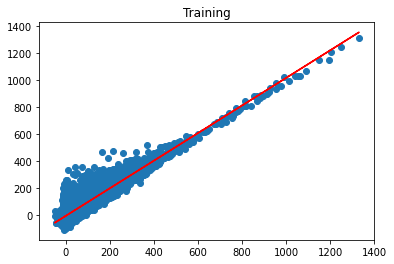

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train, y_pred_train1, color = 'red')
plt.title('Training')

In [ ]:
y_pred_test1 = lin_model.predict(X_test)

Text(0.5, 1.0, 'Test')

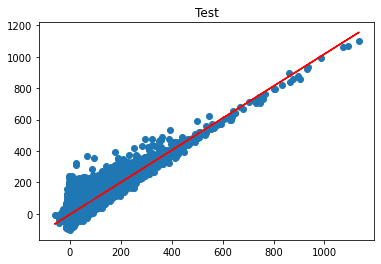

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_test1, color = 'red')
plt.title('Test')

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_test1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_test1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_test1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_test1), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_test1), 2))

Mean absolute error = 10.49
Mean squared error = 231.56
Median absolute error = 7.52
Explain variance score = 0.84
R2 score = 0.84


Multivariate Linear Regression

In [ ]:
X_ml = data_2.drop(columns=['departure_lat',	'departure_lon',	'arrival_lat',	'arrival_lon', 'arrival_schedule',	'arrival_actual',	'arrival_delay'])
X_ml

,departure_schedule,departure_actual,departure_delay
0,1920,1925,5
1,1810,1818,8
2,1815,1812,-3
3,1815,1801,-14
4,930,936,6
...,...,...,...
1857014,830,905,35
1857015,2045,2044,-1
1857016,1225,1233,8
1857017,1010,1018,8


In [ ]:
y_ml= data_2['arrival_delay']
y_ml

0          24
1           8
2         -10
3          -8
4          -1
           ..
1857014    49
1857015     1
1857016    18
1857017    24
1857018    -7
Name: arrival_delay, Length: 1857019, dtype: int64

In [ ]:
Xml_train,Xml_test, yml_train,yml_test = train_test_split(X_ml,y_ml, test_size=0.3, random_state=0)

In [ ]:
mv_model = LinearRegression()

In [ ]:
mv_model.fit(Xml_train, yml_train)

LinearRegression()

In [ ]:
m = mv_model.coef_
m # 3 coef for 3 training features

array([-0.00466905,  0.00349333,  1.02321947])

In [ ]:
y_pred_train2 =  mv_model.predict(Xml_train)

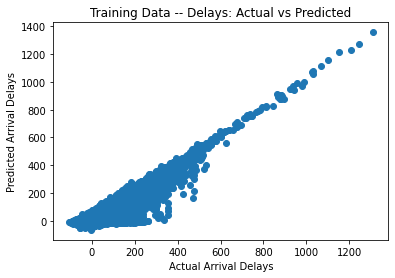

In [ ]:
plt.scatter(yml_train,y_pred_train2)
plt.xlabel('Actual Arrival Delays')
plt.ylabel('Predicted Arrival Delays')
plt.title('Training Data -- Delays: Actual vs Predicted')
plt.show()

In [ ]:
y_pred_test2 = mv_model.predict(Xml_test)

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(yml_test, y_pred_test2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(yml_test, y_pred_test2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(yml_test, y_pred_test2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(yml_test, y_pred_test2), 2)) 
print("R2 score =", round(sm.r2_score(yml_test, y_pred_test2), 2))

Mean absolute error = 10.51
Mean squared error = 232.61
Median absolute error = 7.52
Explain variance score = 0.84
R2 score = 0.84


Results:

Multivariate model performed slightly worse that Simple Linear Regression. 

In [ ]:
ref = sm.explained_variance_score(yml_test, y_pred_test2)

In [ ]:
ref

0.8362135218392617

In [ ]:
yml_test.shape


(557106,)

In [ ]:
y_pred_test2.shape

(557106,)

Decision Tree 

In [ ]:
X = data_2['departure_delay'] #training feature
y = data_2['arrival_delay'] #label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state=23)

In [ ]:
model = tree.DecisionTreeRegressor()

In [ ]:
X_train.shape

(1114211,)

In [ ]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (1114211, 1)
X_test shape:  (742808, 1)


In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_train3 = model.predict(X_train)

Text(0.5, 1.0, 'Training')

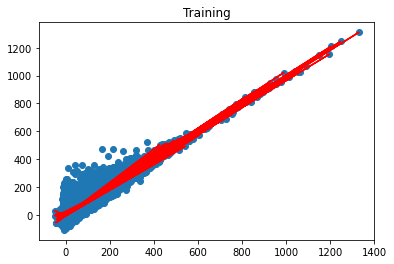

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train, y_pred_train3, color = 'red')
plt.title('Training')

In [ ]:
y_pred_test3 = model.predict(X_test)

Text(0.5, 1.0, 'Testing')

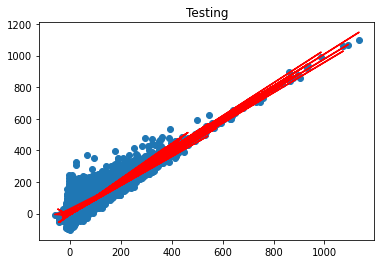

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_test3, color = 'red')
plt.title('Testing')

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_test3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_test3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_test3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_test3), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_test3), 2))

Mean absolute error = 10.5
Mean squared error = 231.34
Median absolute error = 7.58
Explain variance score = 0.84
R2 score = 0.84
